In [143]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [118]:
df0 = pd.read_csv(r"C:\Users\Katia\Documents\UofT\STATS\final_project\universitydataset.csv")

In [119]:
df0 = df0[df0['Target'] != 'Enrolled'] # Only want graduated and dropout outcomes
df0["Target Num"] = df0["Target Num"].astype('float')

df0.rename(columns={"Mother's qualification":'Mothers qualification',
                    "Father's qualification": 'Fathers qualification',
                    "Mother's occupation":'Mothers occupation',    
                    "Father's occupation":'Fathers occupation',
                    "Nacionality":'Nationality'}, inplace=True)

In [125]:
# Transform output into binary
df0['Target Num'] = None
df0.loc[df0['Target'] == 'Graduate','Target Num'] = 0
df0.loc[df0['Target'] == 'Dropout','Target Num'] = 1

In [126]:
# Split variables into categories to apply the corresponding correlation method
cat_vars = ['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nationality',
              'Mothers qualification', 'Fathers qualification', 'Mothers occupation', 'Fathers occupation']

binary_vars = ['Daytime/evening attendance', 'Displaced',' Tuition fees up to date','Gender', 
              'Scholarship holder', 'International', 'Educational special needs', 'Debtor', 'Target Num']

cont_vars = ['Application order','Age at enrollment','Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 
       'Unemployment rate', 'Inflation rate', 'GDP']


print("# categorical variables: ",len(cat_vars))
print("# binary variables: ", len(binary_vars))
print("# continuous variables: ", len(cont_vars))

# categorical variables:  9
# binary variables:  9
# continuous variables:  17


In [175]:
diff_variance_vars = []
equal_variance_vars = []

for i in cont_vars:
    var_diff = np.round(np.absolute(df0[df0['Target Num']==1][i].var() - df0[df0['Target Num']==0][i].var()),2)
    if var_diff < 1: equal_variance_vars.append(i)
    if var_diff >= 1: diff_variance_vars.append(i)

print(diff_variance_vars)
print(equal_variance_vars)

['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']
['Application order', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [195]:
test_results = pd.DataFrame()
p_val = 0.01
for i in equal_variance_vars:
    group1 = df0[df0['Target Num']==1][i]
    group2 = df0[df0['Target Num']==0][i]
    t_test = [stats.ttest_ind(group1, group2, axis=0, equal_var=True, alternative='two-sided')]
    t_test = pd.DataFrame(t_test)
    t_test['variable'] = i
    t_test['n1'] = len(group1)
    t_test['n2'] = len(group2)
    test_results = test_results.append(t_test)
    
for i in diff_variance_vars:
    group1 = df0[df0['Target Num']==1][i]
    group2 = df0[df0['Target Num']==0][i]
    t_test = [stats.ttest_ind(group1, group2, axis=0, equal_var=False, alternative='two-sided')]
    t_test = pd.DataFrame(t_test)
    t_test['variable'] = i
    t_test['n1'] = len(group1)
    t_test['n2'] = len(group2)
    test_results = test_results.append(t_test)
    
test_results.reset_index(drop=True, inplace=True)
test_results = test_results[['variable','n1','n2','statistic','pvalue']]
test_results.loc[test_results['pvalue']< p_val,'test_result'] = 1
test_results.loc[test_results['pvalue']>= p_val,'test_result'] = 0
test_results

,variable,n1,n2,statistic,pvalue,test_result
0,Application order,1421,2209,-5.708720,1.229608e-08,1.0
1,Curricular units 1st sem (without evaluations),1421,2209,4.508495,6.735200e-06,1.0
2,Curricular units 2nd sem (enrolled),1421,2209,-11.205396,1.128426e-28,1.0
3,Curricular units 2nd sem (without evaluations),1421,2209,6.217994,5.607154e-10,1.0
4,Unemployment rate,1421,2209,-0.252866,8.003859e-01,0.0
5,Inflation rate,1421,2209,1.827455,6.771352e-02,0.0
6,GDP,1421,2209,-3.031144,2.453491e-03,1.0
7,Age at enrollment,1421,2209,15.796570,1.252287e-53,1.0
8,Curricular units 1st sem (credited),1421,2209,-2.978949,2.912313e-03,1.0
9,Curricular units 1st sem (enrolled),1421,2209,-10.122656,9.676921e-24,1.0


In [63]:
# #  Categorical Data
# a = 10  # number of rows
# b = 4  # number of columns
# c = 1  # initialize plot counter

# fig = plt.figure(figsize = (20,55))

# for i in df0.columns[:-2]:
#     plt.subplot(a, b, c)
#     plt.title('{}'.format(i))
#     plt.xlabel(i)
#     sns.stripplot(data=df0,
#                 y=i,
#                 x="Target",
#                 dodge=True, 
#                 palette = "muted"
#                )
#     c = c + 1

# plt.tight_layout()
# plt.show()

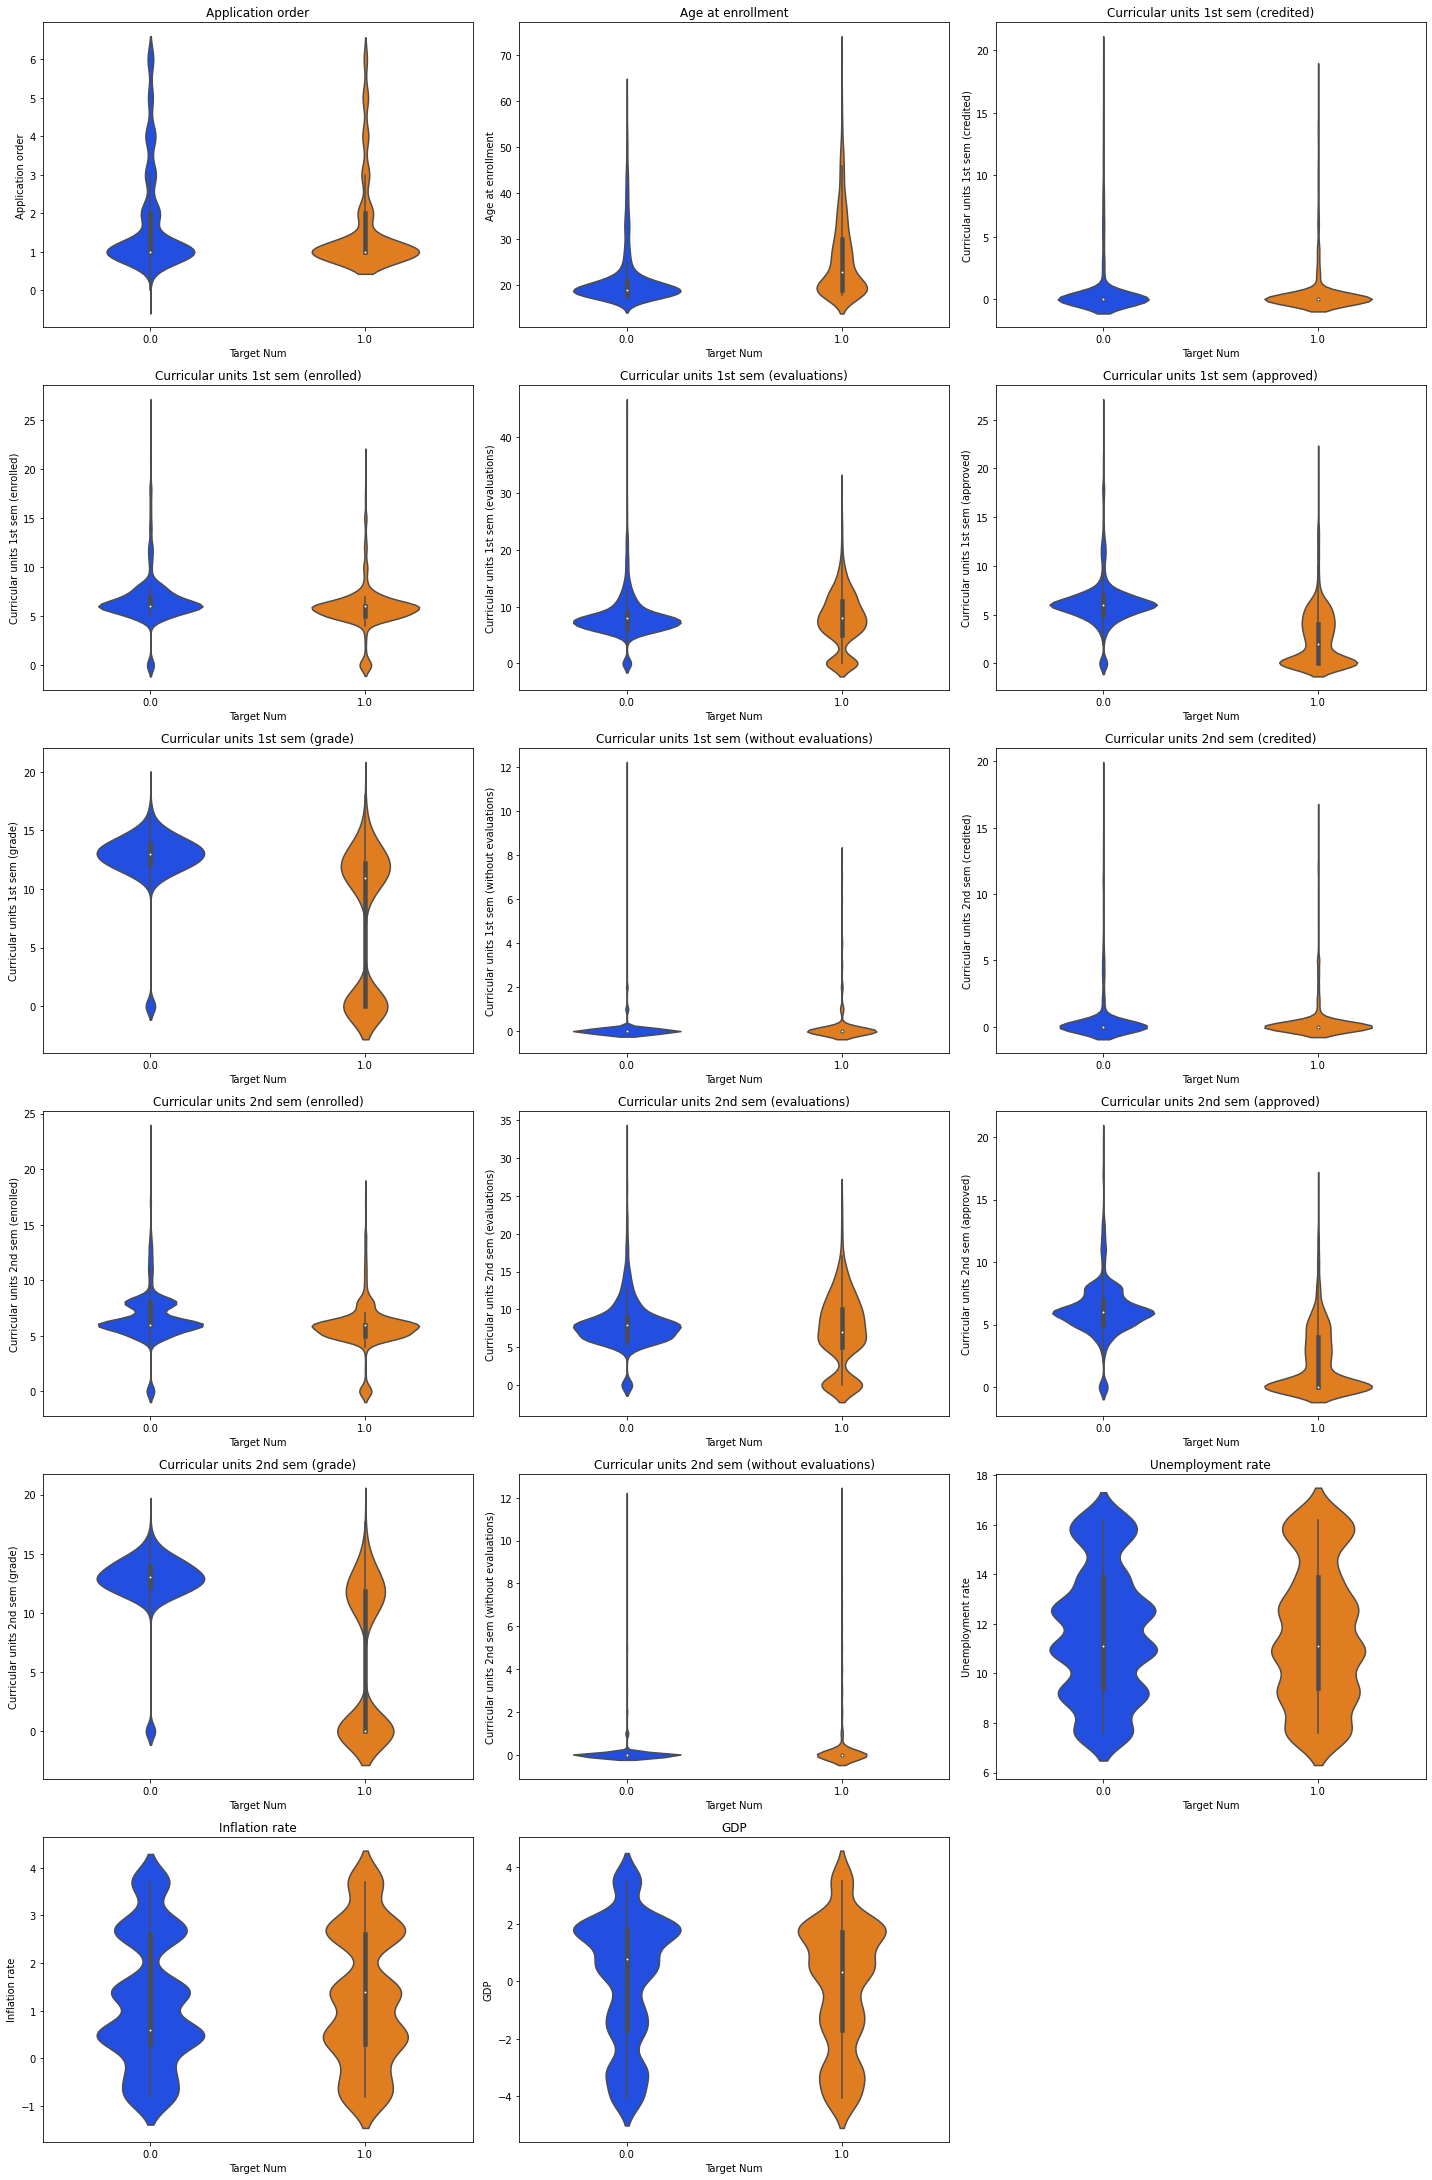

In [135]:
#  Continuous Data
a = 7  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (20,35))


for i in cont_vars:
    df0_ = df0.explode(i)
    df0_[i] = df0_[i].astype('float')
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.violinplot(
        data=df0_,
        x="Target Num",
        y=i,
        dodge=True,   # separate plots of different colors
        width=0.5,    # width of plots
        palette = "bright"
       )
    c = c + 1

plt.tight_layout()
plt.show()

In [141]:
# #  Categorical Data
# a = 3  # number of rows
# b = 3  # number of columns
# c = 1  # initialize plot counter

# fig = plt.figure(figsize = (10,15))


# for i in cat_vars[:-1]:
#     df0_ = df0.explode(i)
#     df0_[i] = df0_[i].astype('float')
#     plt.subplot(a, b, c)
#     plt.title('{}'.format(i))
#     plt.xlabel(i)
#     sns.heatmap(
#         data=df0_,
#         index=i, columns="Target Num"
#         # x="Target Num",
#         # y=i,
#         # dodge=True,   # separate plots of different colors
#         # width=0.5,    # width of plots
#         # palette = "bright"
#        )
#     c = c + 1

# plt.tight_layout()
# plt.show()

In [ ]:
plt.figure(figsize=(14, 5))
sns.stripplot(data=tips,
              x="day",
              y="tip",
              hue="sex",
              dodge=True,    # separate strips of points of different colors
              order = [ "Thur", "Fri", "Sat", "Sun"],
              palette = "muted"
             )

plt.title("Strip plot")
plt.show()

sns.jointplot(data=tips,
              x="total_bill",
              y="tip",
              kind="scatter",   # plot kind
              height=6.5,         # plot height
             )

plt.suptitle("Join plot", y=1.02)   # adds title to the plot
plt.show()

